In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
X_train[0].shape

(28, 28)

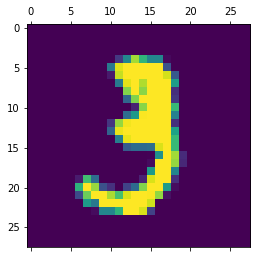

In [6]:
plt.matshow(X_train[10])

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [14]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4739 - accuracy: 0.8749
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9258


In [16]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9243


[0.2677202522754669, 0.9243000149726868]

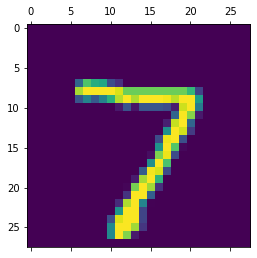

In [18]:
plt.matshow(X_test[0])

In [19]:
Y_predicted = model.predict(X_test_flattened)

In [20]:
Y_predicted[0]

array([2.4949461e-02, 4.3113189e-07, 4.9164355e-02, 9.6483713e-01,
       2.9277503e-03, 1.2412664e-01, 1.4601177e-06, 9.9976289e-01,
       9.2774302e-02, 5.9792745e-01], dtype=float32)

In [21]:
np.argmax(Y_predicted[0])

7

In [22]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   6,   10,  920,   17,   12,    5,   11,   10,   38,    3],
       [   4,    0,   17,  925,    0,   24,    2,   11,   21,    6],
       [   2,    2,    4,    1,  927,    0,    6,    4,    8,   28],
       [  11,    3,    3,   29,   11,  778,   15,    7,   30,    5],
       [  14,    3,    7,    1,    9,   15,  905,    2,    2,    0],
       [   1,    5,   20,   10,    9,    0,    0,  949,    4,   30],
       [  11,    9,    6,   24,    9,   29,    9,   12,  860,    5],
       [  11,    7,    1,   11,   45,    8,    0,   24,    4,  898]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

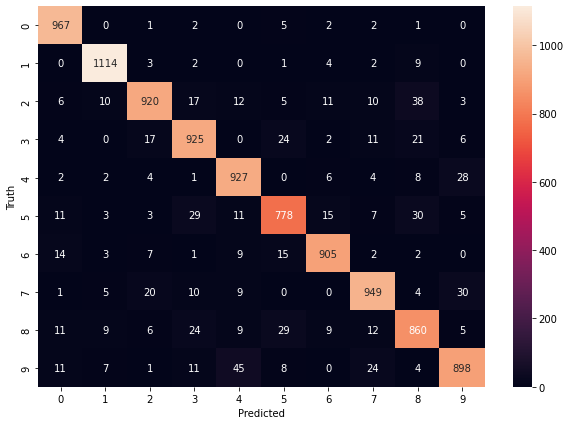

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2764 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1268 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0889 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0523 - accuracy: 0.9845


In [30]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9773


[0.0766935721039772, 0.9772999882698059]